In [19]:
from IPython.display import display
import pandas as pd
import mglearn
import numpy as np

#### 붓꽃 품종을 예측하는 모델 만들기

데이터 포인트 하나(붓꽃 하나)에 대한 기대 출력은 꽃의 품종이 된다.
이런 특정 데이터 포인트에 대한 출력, 즉 품종을 label이라고 한다.

##### 데이터 적재
붓꽃 데이터는 머신러닝 분야에서 오래 전부터 사용해온 데이터셋임, scikit-learn 의 datasets 모듈에 포함되어 있음

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

load_iris() 함수는 Bunch 클래스의 객체를 리턴하는데, 이는 파이썬의 dict와 비슷하게 key, value로 구성되어 있다.

In [3]:
print(type(iris_dataset))
print('iris_dataset의 키: \n{}'.format(iris_dataset.keys()))

<class 'sklearn.utils.Bunch'>
iris_dataset의 키: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


'feature_name' 에는 각 특성을 설명하는 문자열 리스트이다

In [11]:
print(iris_dataset['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


'DESCR' 에는 데이터셋에 대한 간략한 설명이 들어있다.

In [8]:
print(iris_dataset['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

'target_names' 에는 우리가 예측하려는 붓꽃 품종의 이름을 문자열 배열로 가지고 있다.

In [9]:
print(iris_dataset['target_names'])

['setosa' 'versicolor' 'virginica']


실제 데이터는 'target', 'data' 에 들어있다. 'data'는 꽃잎의 길이, 폭, 꽃받침 길이, 폭을 수치 값으로 가지고 있는 Numpy 배열이다.

In [12]:
print(type(iris_dataset['data']))
print(iris_dataset['data'].shape)
print(iris_dataset['data'][:5])

<class 'numpy.ndarray'>
(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


'target'은 각 원소가 붓꽃 하나에 해다하는 1차원 배열이다.

In [15]:
print(iris_dataset['target'].shape)

(150,)


### 이제 무엇을 해야할까
#### 1. 학습 데이터와 평가 데이터를 나누기
#### 2. 이상한 데이터가 없나 살펴보기
#### 3. 모델 만들기
#### 4. 모델 평가하기

##### 1. 학습 데이터와 평가 데이터 나누기  (train_test_split)

학습 데이터와 평가 데이터를 (7 : 3 또는 7.5 : 2.5) 정도로 나누어 준다.

이는 모델이 학습 데이터에서만 잘 작동하는 오버피팅을 막고, 평가 데이터를 이용해 모델을 평가할 수 있기 때문이다.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0
)

sckit-learn 에서 데이터는 대문자 X로 표시하고 레이블은 소문자 y 로 표기한다.

train_test_split 함수로 데이터를 나누기 전에 유사 난수 생성기를 사용해 데이터셋을 무작위로 섞는다.

In [5]:
print('X_train 크기 : {}'.format(X_train.shape))
print('y_train 크기 : {}'.format(y_train.shape))

X_train 크기 : (112, 4)
Y_train 크기 : (112,)


In [7]:
print('X_test 크기: {}'.format(X_test.shape))
print('y_test 크기: {}'.format(y_test.shape))

X_test 크기: (38, 4)
y_test 크기: (38,)


##### 2. 데이터 살펴보기
이런것들을 체크한다.
* 머신러닝 없이도 풀 수 있는 문제 아닌지
* 필요한 정보가 누락되지 않았는지
* 비정상적인 값이나 특이한 값은 없는지 (단위도 잘 살펴본다.)


어떻게????
* 산점도(scatter plot) : 한 특성은 x 축에 놓고 다른 하나는 y 축에 놓아서 데이터 포인트를 하나의 점으로 나타내는 그래프 (3 차원도 가능)
* 산점도 행렬(scattter matrix) : 모든 특성은 짝지어서 만드는 행렬, pandas 의 scatter_matrix 함수 이용

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116318470>,
      dtype=object)

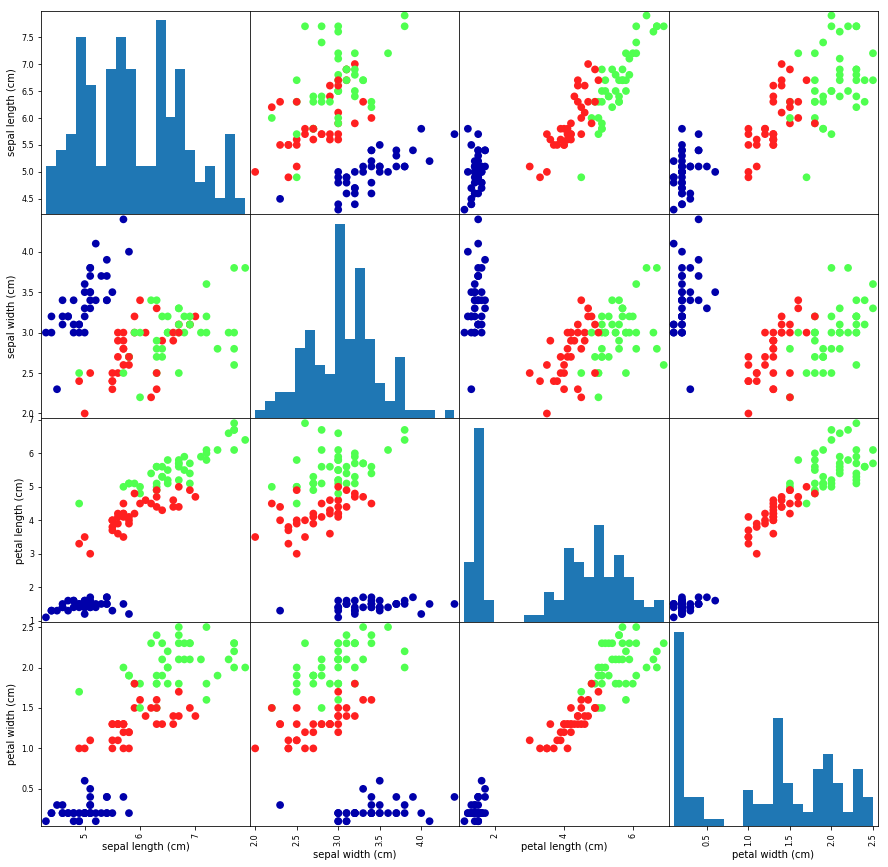

In [14]:
# X_train 데이터를 사용해서 데이터프레임을 만든다.
# 열의 이름은 iris_dataset.feature_names 에 있는 문자열을 사용한다.
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# 데이터프레임을 사용해 y_train에 따라 색으로 구분된 산점도 행렬을 만든다.
pd.plotting.scatter_matrix(iris_dataframe, 
                           c=y_train,
                           figsize=(15, 15),
                           marker='o',
                           hist_kwds={'bins':20},
                           s=60,
                           alpha=8,
                           cmap=mglearn.cm3)

##### 3. 머신러닝 모델 만들기

이 예제에서는 k-NN 알고리즘 사용, scikit-learn 의 머신러닝 모델은 Esimator 파이썬 라는 클래스로 구현되어 있음

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1) # k-NN 에서 가장 중요한 매개변수, 일단 1을 넣는다.

knn 객체는 훈련데이터로 모델을 만들고 새로운 데이터 포인트에 대해 예측하는 알고리즘을 캡슐화 한 것이다. 그리고 알고리즘이 훈련 데이터로부터 추출한 정보를 담고 있다.

훈련 데이터셋으로 부터 모델을 만들려면 knn 객체의 fit 메서드를 사용한다.

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

모델을 만들었으니 이제 실제 새로운 붓꽃을 예측해보자

길이가 5cm, 폭이 2.9cm, 꽃잎의 길이가 1cm, 폭이 0.2cm 인 붓꽃을 새로 발견했는데, 이 붓꽃의 품종이 무엇일지 위에서 만들 모델을 통해 예측해보자

In [20]:
X_new = np.array([[5, 2.9, 1, 0.2]]) # 붓꽃 하나의 측정값은 2차원 Numpy 배열에 행으로 들어간다.
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


예측에는 knn 객체의 predict 메서드를 사용한다.

In [22]:
prediction = knn.predict(X_new)
print("예측: {}".format(prediction))
print("예측한 타깃의 이름: {}".format(iris_dataset['target_names'][prediction]))

예측: [0]
예측한 타깃의 이름: ['setosa']


##### 모델 평가하기

앞에서 만들었던 테스트 세트를 사용해보자. 이 데이터는 모델을 만들 때 사용하지 않았고 테스트 세트에 있는 각 붓꽃의 품종을 정확히 알고 있다.

얼마나 많은 붓꽃 품좀이 정확히 맞았는지 *정확도*를 계산하여 모델의 성능을 평가한다.

In [23]:
y_pred = knn.predict(X_test)
print('테스트 세트에 대한 예측값:\n {}'.format(y_pred))

테스트 세트에 대한 예측값:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [25]:
print('테스트 세트의 정확도 : {:.2f}'.format(np.mean(y_pred == y_test)))
print('테스트 세트의 정확도 : {:.2f}'.format(knn.score(X_test, y_test)))

테스트 세트의 정확도 : 0.97
테스트 세트의 정확도 : 0.97
